# Spam + Phishing dataset Analysis and testing

## Necessary imports

In [1]:
import numpy as np # linear algebra
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle  
Spam_Dataset, Phishing_Dataset = pd.read_csv("emails.csv"), pd.read_csv("Phishing_Email.csv")
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## The Why?

To understand the purpose of this analysis, let's have a look at the headers of the Spam dataset, and the Phishing dataset.
#### Spam dataset :

In [2]:
Spam_Dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


The dataset above has 3001 of columns :
1. Email No.  - **Column 0001**
2. Number of times each word was mentioned in the email - **Column 0002 - 3000**
3. Prediction : 1 - spam  2 - not spam - **Column 3001**

#### Phishing Dataset

In [3]:
Phishing_Dataset.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


The dataset above has 3 columns:
1. Index  - **Column 1**
2. Email body - **Column 2**
3. Email type : Phishing Email / Safe Email - **Column 3**

---
### In this analysis, we aim to transform the phishing dataset into the format of the spam dataset, combining both datasets to assess whether this integration strengthens our findings or not.
---

## Data Analysis and imports

### Importing the Spam dataset

In [4]:
df = pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#### Analysing characteristics about the dataset

In [5]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


We can notice that the Email No. column is useless, we will delete it.

In [6]:
# Drop the "Email No." column from both DataFrames
df.drop(columns=['Email No.'], inplace=True)

### Importing the Phishing dataset

In [7]:
df2 = pd.read_csv("Phishing_Email.csv")
df2.head(3)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email


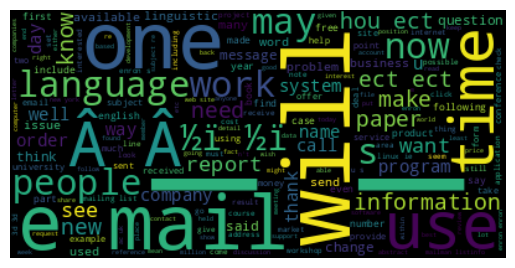

In [8]:
# Concatenate the strings in the 'Email Text' Series with a space separator
text = df2['Email Text'].str.cat(sep=' ')

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data manipulation

Here, we are counting the number of instances of every one of the 3000 words present in the emails.csv dataset, in order to change the format of the Phishing_Email dataset to be compatible with emails.csv's format

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore', message="Upper case characters found in vocabulary while 'lowercase' is True.", category=UserWarning)

# List of words/features as in df_emails
# Here we use a subset for demonstration; you'll need the complete list from df_emails
words = ['the','to','ect','and','for','of','a','you','hou','in','on','is','this','enron','i','be','that','will','have','with','your','at','we','s','are','it','by','com','as','from','gas','or','not','me','deal','if','meter','hpl','please','re','e','any','our','corp','can','d','all','has','was','know','need','an','forwarded','new','t','may','up','j','mmbtu','should','do','am','get','out','see','no','there','price','daren','but','been','company','l','these','let','so','would','m','into','xls','farmer','attached','us','information','they','message','day','time','my','one','what','only','http','th','volume','mail','contract','which','month','more','robert','sitara','about','texas','nom','energy','pec','questions','www','deals','volumes','pm','ena','now','their','file','some','email','just','also','call','change','other','here','like','b','flow','net','following','p','production','when','over','back','want','original','them','below','o','ticket','c','he','could','make','inc','report','march','contact','were','days','list','nomination','system','who','april','number','sale','don','its','first','thanks','business','help','per','through','july','forward','font','free','daily','use','order','today','r','had','fw','set','plant','statements','go','gary','oil','line','sales','w','effective','well','tenaska','take','june','x','within','nbsp','she','how','north','america','being','under','next','week','than','january','last','two','service','purchase','name','less','height','off','agreement','k','work','tap','group','year','based','transport','after','think','made','each','available','changes','due','f','h','services','smith','send','management','stock','sent','ll','co','office','needs','cotten','did','actuals','u','money','before','looking','then','pills','online','request','look','desk','ami','his','same','george','chokshi','point','delivery','friday','does','size','august','product','pat','width','iv','noms','address','above','sure','give','october','future','find','market','n','mary','vance','melissa','said','internet','still','account','those','down','link','hsc','rate','people','pipeline','best','actual','very','end','home','houston','tu','high','her','team','products','many','currently','spot','receive','good','such','going','process','feb','monday','info','david','lloyd','again','both','click','subject','jackie','december','total','na','lisa','ve','september','hours','until','resources','because','aol','february','where','g','investment','issue','duke','since','pay','show','way','global','computron','further','most','place','offer','natural','activity','eastrans','graves','right','prices','date','john','utilities','november','clynes','jan','securities','meeting','susan','hplc','julie','able','received','align','term','id','revised','thursday','pg','fee','hplno','trading','additional','site','txu','data','wellhead','reply','taylor','news','unify','michael','provide','note','much','access','lannou','every','between','keep','tuesday','review','great','tom','put','done','long','save','section','must','v','part','nd','million','check','trade','bob','created','steve','prior','copy','continue','numbers','via','world','demand','hanks','contracts','phone','transaction','customer','possible','pefs','meyers','months','special','without','used','regarding','software','howard','support','buy','young','meters','thru','believe','gcs','cec','entered','control','dec','face','create','weissman','st','color','come','supply','brian','hplo','own','correct','customers','web','allocation','soon','using','development','mark','low','power','problem','once','however','tickets','border','performance','manager','rates','center','companies','risk','details','needed','international','field','even','someone','doc','fuel','lee','paid','while','start','index','include','nominations','act','pricing','scheduled','gathering','type','href','during','aimee','anything','feel','fuels','getting','advice','why','increase','path','sell','works','issues','three','enronxgate','camp','either','form','security','interest','financial','family','xp','plan','current','top','another','src','spreadsheet','allen','wednesday','read','him','working','wynne','add','deliveries','buyback','allocated','firm','james','marketing','tx','results','got','stocks','calpine','might','operations','position','logistics','fax','cost','party','zero','pops','old','pt','scheduling','flowed','dollars','update','gco','katy','including','follow','yahoo','already','suite','error','past','page','stop','changed','book','program','few','better','operating','equistar','move','cotton','aep','y','state','ees','rita','provided','employees','period','morning','cd','hotmail','entex','swing','real','exchange','tomorrow','lst','counterparty','parker','person','follows','valid','visit','little','professional','quality','confirm','something','megan','brenda','around','windows','im','storage','accounting','called','ranch','tax','problems','case','teco','fact','always','too','unsubscribe','amount','coastal','never','rodriguez','love','acton','shut','pipe','project','hope','limited','invoice','credit','full','survey','ray','carlos','anyone','wanted','yet','ic','scott','years','charlie','soft','notice','advise','addition','donald','lsk','wish','katherine','website','hplnl','schumack','prescription','cover','shares','cash','imbalance','united','handle','big','everyone','style','clear','producer','weekend','city','requested','stone','left','payment','mobil','shows','small','confirmed','technology','meet','extend','life','intended','sherlyn','schedule','else','letter','box','bill','richard','lamphier','complete','ever','release','newsletter','anita','clem','having','herod','beginning','papayoti','try','mike','enter','estimates','location','cut','question','things','personal','feedback','cialis','found','area','dow','terms','central','necessary','man','run','reason','third','midcon','charge','president','de','listed','meds','thomas','thought','capital','added','ask','weeks','investing','commercial','star','several','easy','view','cannot','extended','lauri','beaumont','union','times','open','cause','monthly','action','offers','industry','states','side','mailto','probably','neal','second','stephanie','download','flash','agree','mcf','transfer','doing','important','basis','different','final','koch','exxon','remove','microsoft','interested','application','sept','mg','write','lp','east','requirements','code','value','thank','together','exploration','mid','dfarmer','everything','receipt','thu','afternoon','late','enserch','coming','bank','response','tell','shipping','night','events','cynthia','lsp','close','legal','country','direct','expected','ces','corporation','options','really','voip','nominated','etc','latest','potential','priced','edward','valero','material','stack','victor','redeliveries','loss','remember','baumbach','option','private','longer','aware','included','drugs','public','reinhardt','version','hesse','discuss','related','asked','say','viagra','revision','bgcolor','kind','pro','completed','health','ready','plans','registered','regards','carthage','zone','fill','away','computer','systems','industrial','mentioned','told','therefore','growth','sold','track','reports','south','rd','jim','costs','image','expect','return','physical','el','browser','donna','stacey','begin','china','duty','approximately','showing','unit','jones','hard','verify','updated','eol','cs','orders','talk','trying','base','given','server','source','pathed','strong','bryan','directly','risks','whole','major','users','purchases','oo','karen','luong','level','required','delivered','portfolio','riley','ali','easttexas','poorman','bellamy','assistance','nothing','gif','thing','retail','didn','valley','department','cleburne','allow','gpgfin','answer','items','paste','avila','taken','mm','nguyen','ensure','reference','hall','later','lone','user','methanol','facility','network','spoke','though','tabs','taking','status','considered','purchased','says','yourself','paliourg','dy','jeff','businesses','fred','transportation','apache','morris','nov','ltd','brand','federal','statement','oasis','reflect','assets','lamadrid','general','bridge','ability','oct','play','enrononline','compliance','spam','availability','king','understanding','chance','quick','effort','points','reliantenergy','fixed','short','hill','cheryl','aepin','key','understand','valign','capacity','game','took','bring','guys','god','green','care','withers','property','hub','johnson','employee','wants','albrecht','meaning','expectations','mx','moved','cernosek','matter','devon','calls','worldwide','records','removed','lose','large','referenced','walker','iferc','enw','ponton','eileen','ship','upon','enerfin','jennifer','looks','staff','pc','target','waha','making','cp','impact','partner','immediately','shall','channel','takes','sat','others','hear','went','travel','listing','approved','processing','early','enough','sally','starting','distribution','tejas','transactions','stay','earl','superty','doesn','reserves','includes','choose','adobe','publisher','paso','cornhusker','training','markets','content','solution','shell','jpg','print','drive','pain','password','half','herrera','saturday','moopid','hotlist','balance','super','vacation','sex','happy','excess','existing','fund','stella','share','sign','wells','won','four','text','card','tisdale','fwd','appreciate','non','experience','savings','settlements','draft','couple','informed','biz','watch','plus','sun','expense','images','land','occur','flowing','mar','terry','darren','cheap','weight','dynegy','activities','become','mr','format','attention','entire','photoshop','williams','instructions','neon','janet','contains','ago','friends','against','boas','music','certain','liz','svcs','record','fast','dave','held','mind','ua','publication','differ','comments','fun','rest','instant','agent','communications','director','partners','investors','expedia','kevin','assist','safe','approval','allocate','black','none','intrastate','document','eric','hakemack','expired','lower','active','secure','cc','five','determine','press','colspan','missing','jill','discussion','relief','respect','specific','technologies','al','holmes','white','yesterday','medical','pinion','sorry','men','leave','pass','video','gomes','doctor','projects','limit','air','knle','pharmacy','confirmation','opportunity','involve','notify','gtc','class','ken','started','outage','confidential','room','blue','estimated','officer','reach','messages','database','words','prc','tracked','transition','light','national','hot','offering','gulf','provides','iit','demokritos','mckay','average','wide','heard','files','dan','billed','mccoy','rc','exactly','middle','select','bruce','louisiana','receiving','california','event','roll','mops','william','appear','perfect','html','features','join','greater','sunday','pick','featured','cdnow','prize','reveffo','olsen','expects','estimate','near','common','package','title','whether','bought','evergreen','difference','elizabeth','history','monitor','advised','result','sources','school','unaccounted','paragraph','turn','kimberly','increased','communication','members','concerns','uncertainties','associated','reduce','committed','wi','asap','goes','trader','waiting','canada','worth','representative','claim','ceo','london','discussions','php','brazos','trevino','calling','involved','la','gift','southern','groups','hour','tufco','previously','voice','normally','resolve','efforts','nor','recent','purchasing','county','ok','express','generic','according','respond','situation','hold','lot','interconnect','word','came','west','role','opportunities','corporate','remain','similar','readers','suggestions','subscribers','projections','lead','learn','resolved','agreed','sec','head','enjoy','img','rnd','responsible','outstanding','member','panenergy','american','cass','register','promotions','parties','winfree','selling','usage','appropriate','assignment','media','believes','require','submit','model','spinnaker','copano','facilities','opinion','factors','identified','beverly','ews','gdp','deliver','job','profile','across','neuweiler','suggest','girls','manage','usa','local','bad','greg','vs','fees','digital','cf','strangers','registration','delta','rolex','goliad','hesco','success','primary','quarter','course','chairman','petroleum','notes','medications','ei','instead','fine','lake','pre','force','seek','recipient','gain','placed','age','least','body','asking','discussed','hanson','emails','nominate','ext','known','ones','ed','assigned','htmlimg','means','present','various','invoices','gd','agency','along','located','reflects','solutions','ex','house','cds','br','owner','apr','sullivan','basin','linda','worked','car','seen','properties','booked','higher','store','est','revenue','wait','women','far','met','wholesale','range','kcs','recorded','brown','lots','match','input','grant','providing','huge','investor','kelly','apply','paths','handling','pipes','advantage','analysis','focus','draw','red','origination','connection','planning','wilson','golf','summary','item','bankruptcy','expenses','pgev','encina','beaty','memo','initial','thousand','mills','penis','friend','conversation','multiple','martin','names','bit','dth','talked','behalf','preliminary','button','herein','gisb','coupon','sa','oi','appears','door','texaco','csikos','arrangements','cpr','expires','popular','sending','research','conditions','gb','board','ca','applications','tried','paying','acquisition','reporting','normal','maintenance','resume','announced','attachment','buyer','objectives','prod','represent','sandi','hplnol','government','committee','running','tetco','discount','jo','holding','earlier','positions','happen','mailing','decided','recently','chris','xanax','valium','broadband','individual','station','td','financing','somehow','pena','critical','attend','kristen','inform','highly','hl','phillips','minutes','titles','affiliate','wife','lonestar','charlotte','quickly','paper','test','comes','mobile','internal','privacy','ideas','live','gotten','floor','benefit','percent','ms','dr','ebs','msn','gave','dallas','enterprise','rx','spring','ftar','ooking','hawkins','exclusive','selected','baxter','actually','single','shop','nominates','guarantee','minute','correctly','unique','bid','building','stated','accept','assumptions','centana','senior','pill','kinsey','sap','immediate','goals','category','mitchell','acceptance','termination','sweeney','facts','amazon','arrangement','josey','funds','among','accuracy','mean','rather','kim','egmnom','indicate','updates','extra','adjustment','accounts','lowest','gold','purposes','remaining','talking','entry','road','load','simply','europe','lindley','understood','logos','hi','speed','profit','notified','jackson','z','vols','serve','additionally','shipped','connor','fontfont','q','kept','dollar','jr','almost','fri','paul','documents','analyst','crude','cap','shopping','aug','clearance','schneider','ftworth','father','anticipated','resellers','congress','counterparties','epgt','buying','san','invest','cartwheel','brandywine','wrong','mtbe','split','submitted','hull','gra','children','leader','true','baseload','mb','letters','billion','rights','mtr','heidi','clean','historical','asset','foreign','gr','entity','developed','maybe','jeffrey','transmission','outside','lost','membership','invitation','ocean','legislation','hernandez','pep','payments','wallis','rev','kenneth','seaman','annual','guess','bammel','lines','guadalupe','zivley','exception','example','pathing','revisions','pipelines','equity','budget','wed','dealers','window','juno','claims','bottom','standard','alternative','merchant','braband','topica','telephone','reliant','speculative','yes','en','morgan','cable','edmondson','participate','usb','throughout','checked','myself','contents','fat','investments','six','build','giving','calendar','inherent','edition','darial','hr','trip','pull','moving','concern','proposed','rm','deer','enquiries','alt','tammy','front','reduction','evening','concerning','gets','effect','isn','haven','cowboy','sea','dvd','launch','minimum','changing','built','avoid','chief','stephen','chad','manual','finally','strategy','executive','thousands','conflict','resulting','policy','commission','stand','positive','quantity','programs','airmail','texoma','prepared','austin','matt','intent','uae','citibank','jaquet','hol','harris','min','hplr','advance','weather','terminated','whom','sheet','venturatos','cellpadding','hotel','leading','guaranteed','idea','announce','pleased','award','operational','prepare','schedulers','child','sum','quote','adjusted','warning','issued','ga','cross','detail','pertaining','tess','owe','crow','availabilities','griffin','christy','crosstex','eel','itoy','heart','licensed','overnight','cal','otherwise','luck','stretch','generation','broker','construed','except','traders','carry','column','approx','main','alert','charges','step','revenues','games','gottlob','looked','individuals','beck','stuff','welcome','port','glover','description','daniel','quantities','park','managing','town','seller','summer','tina','dates','eff','dudley','ferc','robin','charles','customerservice','zonedubai','emirates','aeor','clickathome','materia','island','vaughn','sexual','eiben','forms','delete','realize','tailgate','behind','villarreal','lon','benoit','simple','tech','ahead','double','ordering','se','miss','law','eb','post','outlook','equipment','leslie','reeves','org','tools','cold','adjustments','contained','saw','edit','deciding','finance','patti','listbot','river','kathryn','holiday','successful','unable','advisor','pool','bryce','outages','adjust','screen','otc','brent','helps','auto','foot','region','links','contain','knowledge','yvette','dial','pressure','detailed','indicated','charged','sites','makes','female','mcmills','cook','mazowita','meredith','allocations','meetings','particular','environment','drug','search','mailings','designed','rock','measurement','art','corrected','kids','benefits','tv','seems','husband','fix','grow','decision','wireless','mo','conference','interview','levels','copies','cindy','urgent','regular','payroll','shown','consumers','reliable','tr','indicating','coast','greif','severson','tri','vicodin','liquids','significant','intend','usd','pager','avails','spencer','ce','charset','verdana','fully','flynn','da','personnel','multi','closed','vice','administration','gmt','midstream','eye','speckels','studio','cilco','likely','managers','structure','sit','parent','preparation','mix','mmbtus','timing','happening','lottery','killing','acquire','mack','pcx','fares','internationa','notification','swift','identify','areas','separate','unless','producers','allows','pretty','waste','joanie','drop','taxes','premium','teams','choice','largest','addressed','dolphin','ngo','self','davis','htm','ad','graphics','hit','competitive','thus','incorrect','ti','acts','previous','edu','proven','electric','pictures','charlene','benedict','chevron','treatment','lesson','player','sds','wc','intraday','assurance','sdsnom','rebecca','quit','netco','intra','whatever','lyondell','reviewed','solicitation','filings','log','noon','locations','joe','completely','rivers','language','street','automatically','ft','powerful','specials','alone','fyi','properly','proper','explode','decrease','medication','desks','impacted','anywhere','completion','banking','consider','certificate','exercise','zeroed','websites','tonight','diligence','education','club','vegas','affordable','sports','predictions','billing','diamond','posted','prayer','actions','nomad','resuits','jason','purpose','deposit','entertainment','materially','blank','resolution','anderson','nat','rom','soma','organization','aquila','solid','affected','transco','spend','responsibilities','assume','header','accountant','functionality','meant','killed','analysts','rick','rolled','noted','discovered','offices','torch','often','york','joint','briley','competition','guide','intercompany','son','settlement','presently','cart','tim','entries','russ','valadez','rules','molly','apple','atleast','scheduler','pi','hector','dell','opm','hottlist','yap','gone','heal','llc','setting','reached','proposal','hundred','trust','official','table','mcgee','written','operation','cellspacing','laptop','feature','ram','victoria','larry','units','requests','continued','external','pack','couldn','lateral','strictly','resource','although','sr','commodity','pulled','protocol','bed','generated','redmond','girl','apparently','tool','reviews','released','movies','inside','shareholder','rr','compensation','beliefs','foresee','lease','rule','marta','chemical','hillary','hp','tongue','adonis','advises','master','eight','wasn','itself','documentation','xl','humble','elsa','pics','hughes','brokered','distribute','consultation','sheri','lists','cannon','treated','factor','putting','verified','releases','enhanced','controls','craig','worksheet','conversion','max','hrs','helpful','hand','producing','dl','developing','design','woman','understands','standards','promotion','sarco','hospital','ffffff','respective','richmond','conoco','driver','easily','sean','den','gateway','holdings','brad','college','gains','adult','dated','em','mcloughlin','anticipates','henderson','julia','negotiations','sofftwaares','garrick','comstock','trochta','imceanotes','ecom','larger','nommensen','coordinate','partnership','otcbb','announces','louis','dealer','reliance','season','agua','dulce','offshore','gathered','forever','function','happened','sample','easier','aim','pa','expensive','thinks','maximum','war','mining','drilling','owned','todd','advanced','provider','pending','providers','silver','cherry','hundreds','thoughts','addresses','beach','baby','requires','caused','variance','extension','carbide','anytime','adding','triple','dawn','martinez','entering','login','bretz','ls','writeoff','locker','wiil','block','blood','romeo','responsibility','brennan','btu','venture','connected','nascar','opinions','executed','cell','flag','doctors','invoiced','marlin','coffey','nice','amazing','ii','determined','handled','keeping','touch','upgrade','shipment','brought','forwarding','confidence','hesitate','seem','electronic','appreciated','deadline','franklin','heather','reasons','passed','safety','procedures','payback','networks','utility','count','africa','exact','creating','loading','processed','court','tier','sender','att','mailbox','glad','buddy','profiles','portion','protection','compressor','okay','oba','finding','heads','bar','turned','remote','illustrator','oem','noticed','mails','darron','nick','urbanek','jerry','barrett','ehronline','und','abdv','egm','couid','technoiogies','owns','improved','eat','moment','owners','develop','installed','videos','frank','hearing','inches','busy','ref','valuable','et','un','url','shawna','iso','capture','extremely','ya','causing','consent','anyway','round','discrepancies','cheapest','confidentiality','disclosure','prohibited','vol','correction','communicate','processes','spain','shareholders','supported','smoking','mine','biggest','erections','platform','miles','exciting','association','die','restricted','ma','income','goal','bane','collection','nathan','wind','piece','familiar','gore','experiencing','pico','mai','dewpoint','tessie','hair','bussell','diane','delivering','originally','accurate','began','seven','tracking','randall','gay','emerging','prescriptions','story','arial','florida','space','ownership','european','sutton','concerned','male','spent','agreements','industries','picture','filled','continues','death','choate','majeure','device','hence','ten','campaign','massive','eyes','requesting','lives','reminder','eliminate','copied','consemiu','died','sound','offered','expressed','anti','duplicate','steps','books','improve','implementation','gives','ac','peggy','proprietary','ways','advertisement','published','earnings','mortgage','consumer','ct','tape','fl','cia','organizational','agenda','rental','carriere','moshou','church','trouble','medium','aggressive','smart','zajac','ail','participants','gap','earthlink','wire','trades','messaging','ut','wil','richardson','blvd','glo','seneca','pubiisher','imited','isc','contacts','sleep','kyle','cooperation','possibly','leaving','motor','hopefully','tie','speak','mi','suggested','canadian','uses','connect','pvr','rich','places','auction','po','spacer','client','recommended','royalty','amended','default','living','regardless','human','bringing','focused','stores','variety','netherlands','leaders','bowen','salary','signed','penny','loan','desktop','chase','pleasure','compare','session','overall','stranger','length','planned','sp','darrel','raise','palestinian','expiration','serial','premiere','suzanne','reduced','players','applicable','impotence','buckley','wayne','hansen','indicative','sabrae','dating','winners','marshall','highest','ea','presentation','allowed','square','danny','gepl','hydrocarbon','alpine','christmas','muscle','souza','relating','begins','ecf','forth','answers','audit','approve','lunch','types','starts','difficult','le','lasts','series','till','edge','growing','covered','shipper','sometime','republic','filter','sooner','increasing','nelson','percentage','returned','pop','interface','kin','experienced','prime','merger','obtain','ryan','servers','attachments','achieve','effects','gov','examples','procedure','explore','caribbean','rally','amounts','comfort','attempt','greatly','amelia','engel','delay','fare','der','cove','filing','fletcher','leth','undervalued','cents','esther','hlavaty','reid','lls','troy','palmer','metals','las','carter','luis','migration','brief','hess','therein','ur','pond','joanne','community','tglo','eogi','ml','wysak','felipe','errors','affect','convenient','minimal','boost','incremental','decide','reserve','superior','kerr','willing','quite','wild','unlimited','sans','mother','computers','unfortunately','ordered','satisfaction','priority','traded','testing','portal','ward','lets','aren','knows','refer','shot','fda','tue','saying','cancel','forecast','cousino','bass','permanent','phones','technical','whose','objective','cards','distributed','learning','fire','drill','towards','forget','explosion','gloria','formula','redelivery','audio','visual','encoding','approach','doubt','staffing','excite','corel','tm','enronavailso','contacting','alland','heavy','economic','nigeria','milwaukee','phillip','curve','returns','padre','kathy','buttons','sir','vary','sounds','disclose','authority','flw','straight','worldnet','beemer','ooo','defs','thorough','officers','flight','prefer','awesome','macintosh','feet','constitutes','formosa','porn','armstrong','driscoll','watches','newsietter','twenty','tommy','fields','method','setup','allocating','initially','missed','clarification','especially','dorcheus','del','millions','insurance','pooling','trial','tennessee','ellis','direction','bold','catch','performing','accepted','matters','batch','continuing','winning','symbol','offsystem','decisions','produced','ended','greatest','degree','solmonson','imbalances','fall','fear','hate','fight','reallocated','debt','reform','australia','plain','prompt','remains','ifhsc','enhancements','connevey','jay','valued','lay','infrastructure','military','allowing','ff','dry','Prediction']

# Initialize CountVectorizer with the modified vocabulary
vectorizer = CountVectorizer(vocabulary=words, lowercase=True)

# Replace NaN values in 'Email Text' with empty strings
df2['Email Text'] = df2['Email Text'].fillna('')

# Apply the vectorizer to the Email Text column of df_phishing
word_counts = vectorizer.fit_transform(df2['Email Text'])

# Create a new DataFrame from the word counts
df_transformed = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

# Align other columns, e.g., map 'Email Type' to 'Prediction'
df_transformed['Prediction'] = df2['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})  # Adjust this mapping as needed

# Now df_transformed should be formatted similarly to df_emails
df_transformed.head(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,2,7,0,3,2,3,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,5,2,0,1,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,4,7,6,4,2,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,2,4,1,0,3,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# # Concatenate the DataFrames
combined_df = pd.concat([df, df_transformed], ignore_index=True)
combined_df.head(40000)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23817,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
23818,0,1,0,1,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
23819,7,6,0,2,3,1,0,2,0,7,...,0,0,0,0,0,0,0,0,0,0
23820,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating the NB Model


In [11]:
X = df.iloc[:,1:3001]
Y = df.iloc[:,-1].values
X2 = combined_df.iloc[:,1:3001]
Y2 = combined_df.iloc[:,-1].values
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25, random_state =30)
train_x2,test_x2,train_y2,test_y2 = train_test_split(X2,Y2,test_size = 0.25,random_state =30)

# Naive Bayes

In [12]:
num_iterations = 20
df_accuracy = 0
df_combined_accuracy = 0
for i in range(num_iterations):
    train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25, random_state = i)
    train_x2,test_x2,train_y2,test_y2 = train_test_split(X2,Y2,test_size = 0.25, random_state = i)
    
    mnb1 = MultinomialNB(alpha=1.9)
    mnb1.fit(train_x,train_y)
    df_accuracy += accuracy_score(mnb1.predict(test_x), test_y)
    
    mnb2 = MultinomialNB(alpha=1.9)
    mnb2.fit(train_x2,train_y2)
    df_combined_accuracy += accuracy_score(mnb2.predict(test_x), test_y)

avg1 = df_accuracy / num_iterations
avg2 = df_combined_accuracy / num_iterations

print("When using 20 iterations : ")
print("Average Accuracy Score for Naive Bayes trained on the emails dataset alone:", avg1)
print("Average Accuracy Score for Naive Bayes trained on the combined dataset:", avg2)

When using 20 iterations : 
Average Accuracy Score for Naive Bayes trained on the emails dataset alone: 0.9583139984532096
Average Accuracy Score for Naive Bayes trained on the combined dataset: 0.6780355761794278


# Support Vector Machines


In [13]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
svc.fit(train_x,train_y)
y_pred = svc.predict(test_x)
print("Accuracy Score for SVC trained on the emails dataset alone: ", accuracy_score(y_pred,test_y))

Accuracy Score for SVC trained on the emails dataset alone:  0.9203402938901779


In [14]:
svc2 = SVC(C=1.0,kernel='rbf',gamma='auto')         
svc2.fit(train_x2,train_y2)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC2 trained on the combined dataset:", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC2 trained on the combined dataset: 0.9203402938901779


# Random Forests (Bagging)

In [15]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
print("Accuracy Score of Random Forest Classifier trained on the emails dataset alone: ", accuracy_score(y_pred3,test_y))

Accuracy Score of Random Forest Classifier trained on the emails dataset alone:  0.9984532095901005


In [16]:
rfc2 = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc2.fit(train_x2,train_y2)
y_pred3 = rfc2.predict(test_x)
print("Accuracy Score of Random Forest Classifier trained on the combined dataset: ", accuracy_score(y_pred3,test_y))

Accuracy Score of Random Forest Classifier trained on the combined dataset:  0.9992266047950503
